In [14]:
import keras
from keras import layers
import os
import numpy as np
from PIL import Image 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

image_folder = './Pikachu images\\FilteredImages'
image_size = (128, 128)

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Load and ensure RGB format
    img = img.resize(image_size)
    img_array = np.asarray(img)
    return img_array / 255.0  # Normalize


X = []  # List to hold image data
y = []  # List to hold labels

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)

    if filename.startswith('pikachu'):
        label = 1  # Assign label 1 for Pikachu
    elif filename.startswith('not_pikachu'):
        label = 0  # Assign label 0 for not Pikachu
    else:
        continue  # Skip any files not matching the pattern

    img_array = load_and_preprocess_image(img_path)
    X.append(img_array)
    y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)


In [38]:
from keras import regularizers

model = Sequential([
    Conv2D(128, (3, 3), activation='selu', kernel_regularizer=regularizers.l2(0.01), input_shape=(128, 128, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='selu'),
    MaxPooling2D(4),
    Flatten(),
    Dense(64, activation='selu'),
    Dense(1, activation='sigmoid') 
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Set the learning rate manually
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)



# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/10
32/32 [==============================] - 20s 618ms/step - loss: 1.4890 - accuracy: 0.7244 - val_loss: 1.3992 - val_accuracy: 0.7800
Epoch 2/10
32/32 [==============================] - 18s 552ms/step - loss: 1.2753 - accuracy: 0.8287 - val_loss: 1.4630 - val_accuracy: 0.7440
Epoch 3/10
32/32 [==============================] - 17s 517ms/step - loss: 1.2126 - accuracy: 0.8537 - val_loss: 1.3856 - val_accuracy: 0.7640
Epoch 4/10
32/32 [==============================] - 17s 522ms/step - loss: 1.1615 - accuracy: 0.8557 - val_loss: 1.2438 - val_accuracy: 0.8080
Epoch 5/10
32/32 [==============================] - 17s 526ms/step - loss: 1.1365 - accuracy: 0.8577 - val_loss: 1.2760 - val_accuracy: 0.7800
Epoch 6/10
32/32 [==============================] - 15s 451ms/step - loss: 1.0823 - accuracy: 0.8667 - val_loss: 1.3997 - val_accuracy: 0.7200
Epoch 7/10
32/32 [==============================] - 14s 428ms/step - loss: 1.0362 - accuracy: 0.8768 - val_loss: 1.1890 - val_accuracy: 0.8080

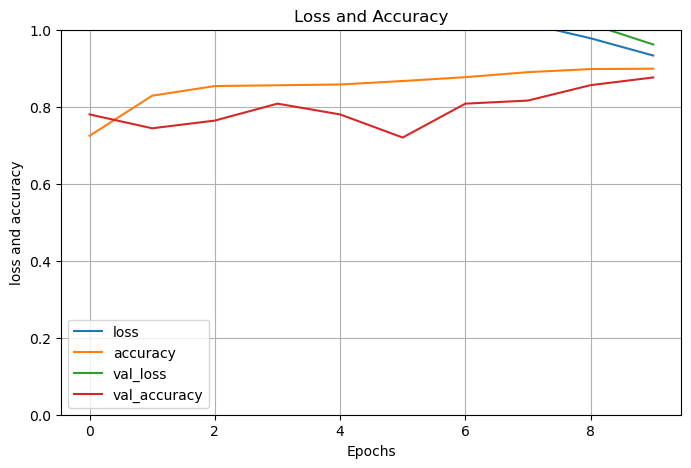

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('loss and accuracy')
plt.title('Loss and Accuracy')
plt.show()









# import matplotlib.pyplot as plt

# # Access validation metrics from the model's history
# val_loss = history.history['val_loss']
# val_accuracy = history.history['val_accuracy']

# # Set up epochs for the x-axis 
# epochs = range(1, len(val_loss) + 1)
# model.evaluate(X, y)

# # Create the plots
# plt.figure(figsize=(12, 5))  # Adjust figure size as needed 

# plt.subplot(1, 2, 1)  # Plot for validation loss 
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)  # Plot for validation accuracy
# plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
# plt.title('Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()


39/39 [==============================] - 4s 106ms/step


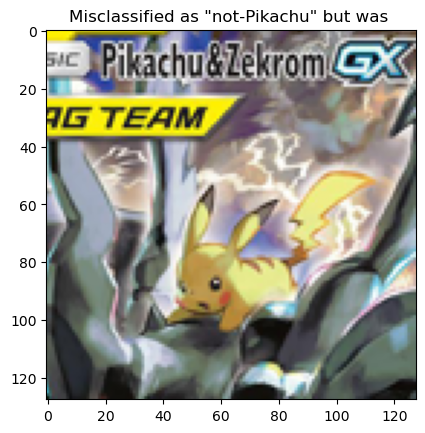

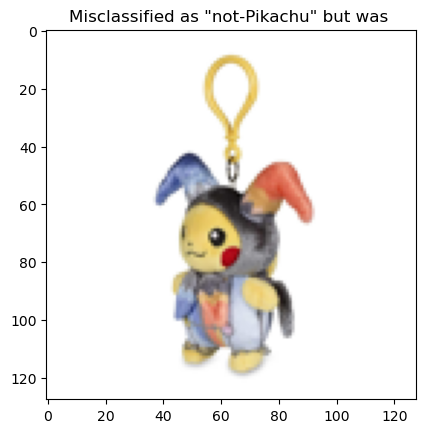

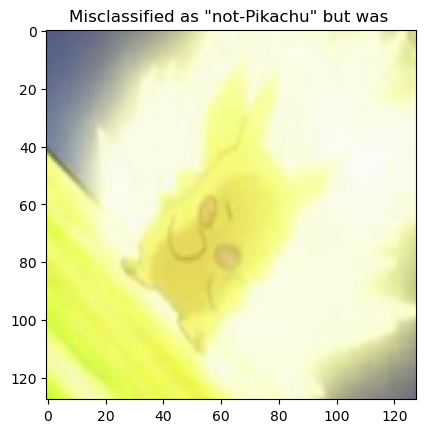

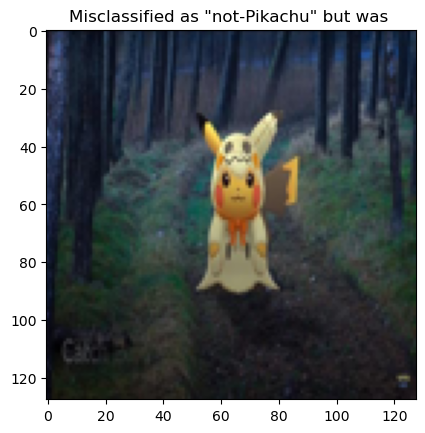

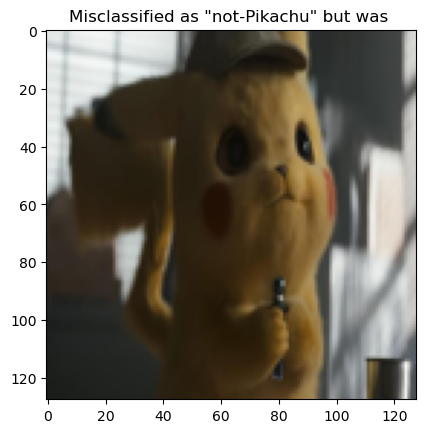

In [17]:
import matplotlib.pyplot as plt

predictions = model.predict(X)
misclassified_count = 0

for i in range(len(predictions)):
    predicted_class = np.round(predictions[i]).astype(int)[0] 
    true_class = y[i]

    if predicted_class == 0 and true_class == 1:
        misclassified_count += 1
        image_array = X[i] 
        plt.imshow(image_array)
        plt.title('Misclassified as "not-Pikachu" but was ')
        plt.show()
        if misclassified_count == 5:
            break

39/39 [==============================] - 4s 107ms/step


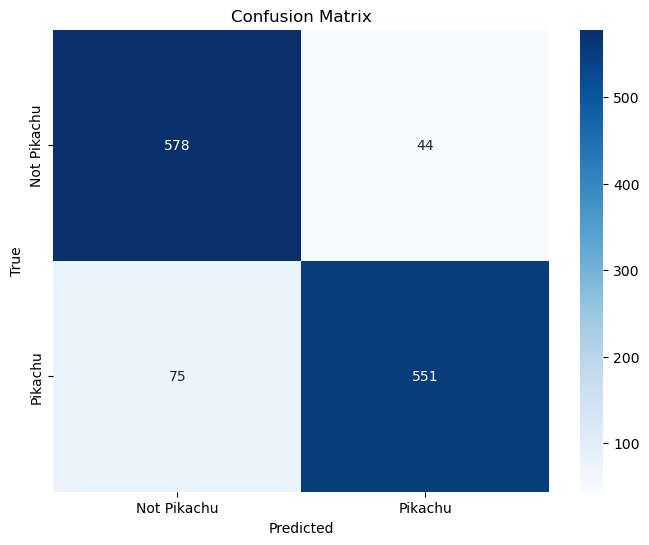

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
predictions = (model.predict(X) > 0.5).astype("int32")  # Assuming binary classification

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Pikachu', 'Pikachu'], 
            yticklabels=['Not Pikachu', 'Pikachu'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 122ms/step
1
Probability of Pikachu: 0.97
The image is predicted to be Pikachu!


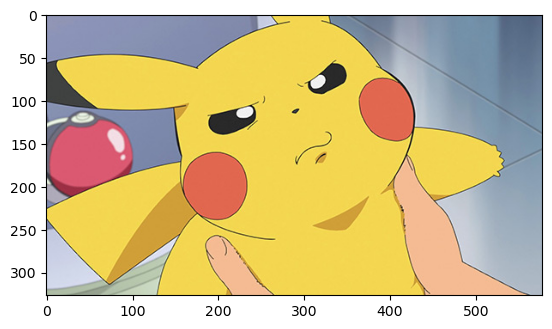

1/1 [==============================] - 0s 50ms/step
0
Probability of Pikachu: 0.19
The image is predicted to be NOT Pikachu.


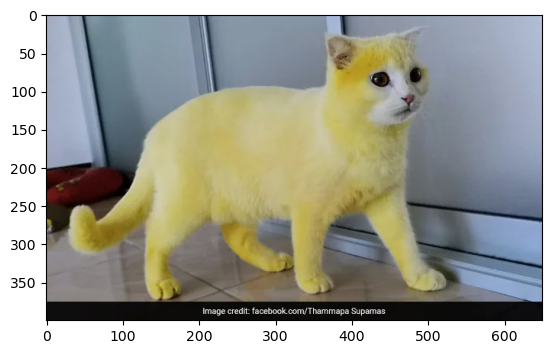

1/1 [==============================] - 0s 40ms/step
0
Probability of Pikachu: 0.17
The image is predicted to be NOT Pikachu.


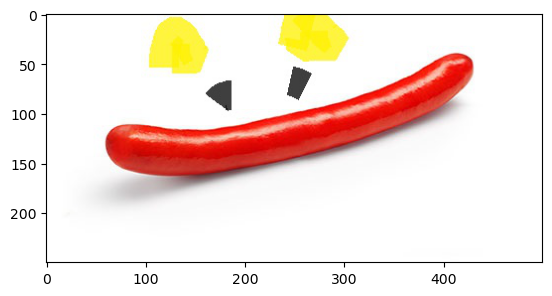

1/1 [==============================] - 0s 51ms/step
0
Probability of Pikachu: 0.28
The image is predicted to be NOT Pikachu.


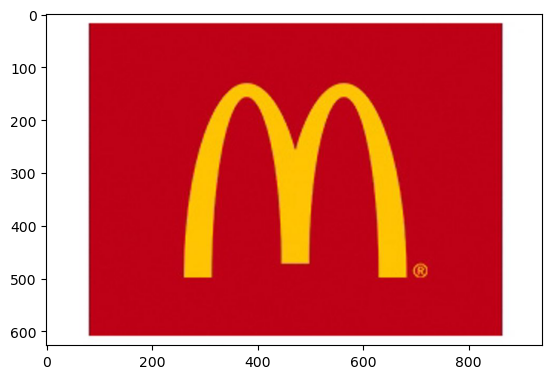

1/1 [==============================] - 0s 44ms/step
1
Probability of Pikachu: 0.69
The image is predicted to be Pikachu!


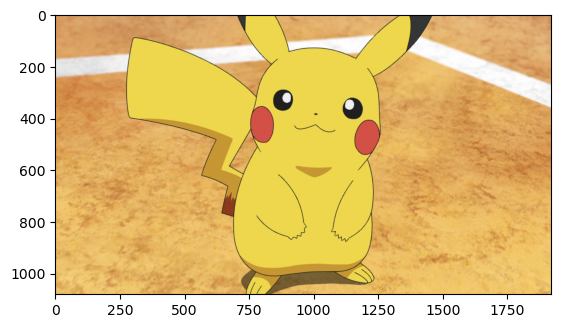

1/1 [==============================] - 0s 50ms/step
0
Probability of Pikachu: 0.39
The image is predicted to be NOT Pikachu.


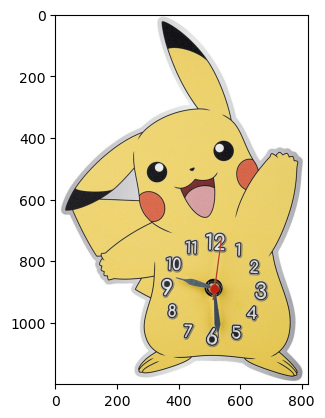

1/1 [==============================] - 0s 40ms/step
1
Probability of Pikachu: 0.66
The image is predicted to be Pikachu!


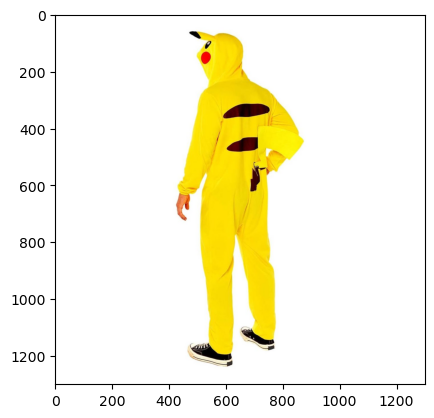

1/1 [==============================] - 0s 40ms/step
0
Probability of Pikachu: 0.05
The image is predicted to be NOT Pikachu.


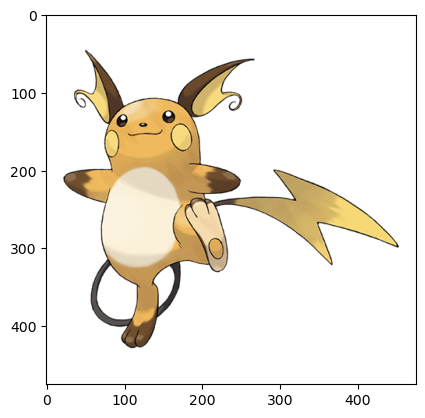

1/1 [==============================] - 0s 31ms/step
1
Probability of Pikachu: 0.91
The image is predicted to be Pikachu!


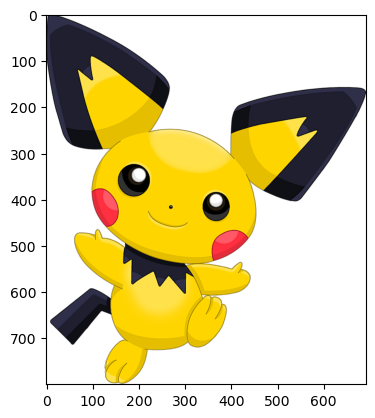

1/1 [==============================] - 0s 40ms/step
0
Probability of Pikachu: 0.02
The image is predicted to be NOT Pikachu.


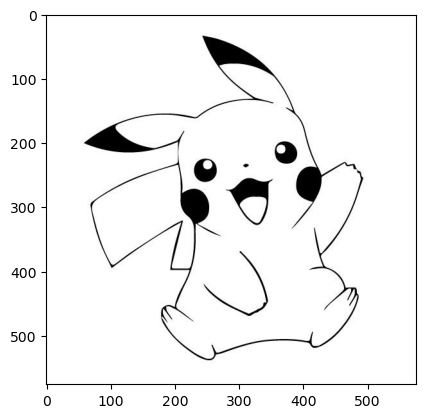

1/1 [==============================] - 0s 43ms/step
0
Probability of Pikachu: 0.45
The image is predicted to be NOT Pikachu.


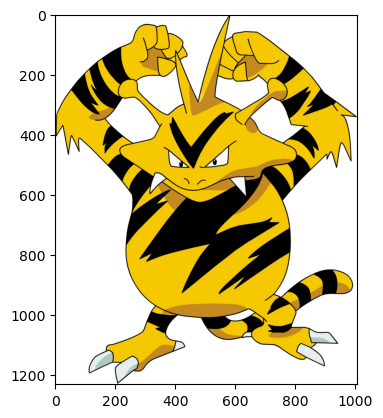

1/1 [==============================] - 0s 69ms/step
0
Probability of Pikachu: 0.02
The image is predicted to be NOT Pikachu.


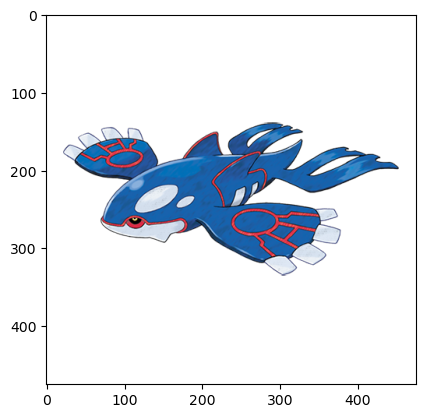

1/1 [==============================] - 0s 41ms/step
0
Probability of Pikachu: 0.40
The image is predicted to be NOT Pikachu.


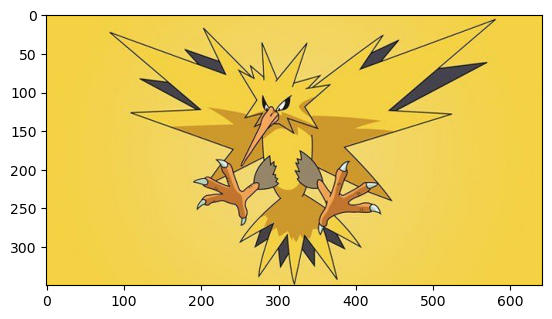

1/1 [==============================] - 0s 72ms/step
0
Probability of Pikachu: 0.07
The image is predicted to be NOT Pikachu.


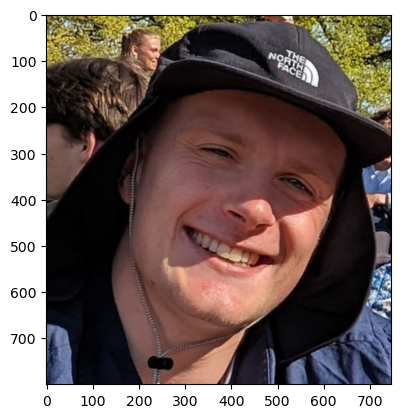

1/1 [==============================] - 0s 62ms/step
0
Probability of Pikachu: 0.12
The image is predicted to be NOT Pikachu.


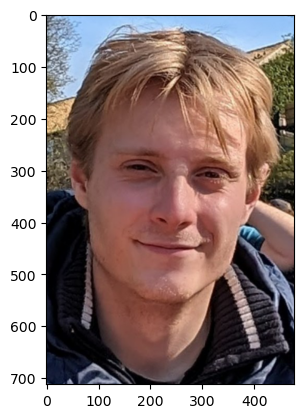

1/1 [==============================] - 0s 46ms/step
0
Probability of Pikachu: 0.17
The image is predicted to be NOT Pikachu.


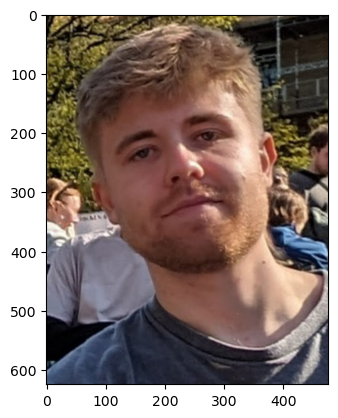

In [19]:
def imagesTest(image_path):
    image_data = load_and_preprocess_image(image_path)
    image_data = np.expand_dims(image_data, axis=0)
    # Ovenstående er tilføjet for at få det til at passe med dimensionerne af input til modellen

    prediction = model.predict(image_data)
    pikachu_probability = prediction[0][0]
    predicted_class = np.round(prediction).astype(int)[0][0]
    print(predicted_class)
    print(f"Probability of Pikachu: {pikachu_probability:.2f}")

    if predicted_class == 1:
        print("The image is predicted to be Pikachu!")
    else:
        print("The image is predicted to be NOT Pikachu.")

    # Display the image
    img = Image.open(image_path)  # Load the original image
    plt.imshow(img)
    plt.show()

image_path = './test.jpg'
image_path2 = './test2.jpg'
image_path3 = './test3.jpg'
image_path4 = './test4.jpg'
image_path5 = './test5.jpg'
image_path6 = './test6.jpg'
image_path7 = './test7.jpg'
image_path8 = './test8.jpg'
image_path9 = './test9.jpg'
image_path10 = './test10.jpg'
image_path11 = './test11.jpg'
image_path12 = './test12.jpg'  
image_path13 = './test13.jpg'
image_path14 = './test14.jpg'
image_path15 = './test15.jpg'
image_path16 = './test16.jpg'

imagesTest(image_path10)
imagesTest(image_path)
imagesTest(image_path2)
imagesTest(image_path3)
imagesTest(image_path4)
imagesTest(image_path5)
imagesTest(image_path6)
imagesTest(image_path7)
imagesTest(image_path8)
imagesTest(image_path9)
imagesTest(image_path11)
imagesTest(image_path12)
imagesTest(image_path13)
imagesTest(image_path14)
imagesTest(image_path15)
imagesTest(image_path16)

